Import Libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [112]:
orders_df = pd.read_csv('orders.csv')
users_df = pd.read_csv('users.csv')
returns_df = pd.read_csv('returens.csv')

Check for Missing Values

In [113]:
print(orders_df.isnull().sum())
print(returns_df.isnull().sum())
print(users_df.isnull().sum())

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
City                     0
Zip Code                 0
State                    0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
dtype: int64
Order ID    0
Status      0
dtype: int64
Region     0
Manager    0
dtype: int64


In [114]:
with pd.ExcelWriter('combined_data.xlsx') as writer:
    orders_df.to_excel(writer, sheet_name='Orders')
    users_df.to_excel(writer, sheet_name='Users')
    returns_df.to_excel(writer, sheet_name='Returns')


In [115]:
df = pd.read_excel('combined_data.xlsx')
df

,Unnamed: 0,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,...,City,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin
0,0,1,3,10/13/2018,Low,6,261.5400,0.04,Regular Air,-213.25,...,Highland Park,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80
1,1,2,6,2/20/2020,Not Specified,2,6.9300,0.01,Regular Air,-4.64,...,Edmonds,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55
2,2,3,32,7/15/2019,High,26,2808.0800,0.07,Regular Air,1054.82,...,Elk Plain,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65
3,3,4,32,7/15/2019,High,24,1761.4000,0.09,Delivery Truck,-1748.56,...,Elk Plain,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72
4,4,5,32,7/15/2019,High,23,160.2335,0.04,Regular Air,-85.13,...,Elk Plain,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,8394,8395,59971,5/31/2019,Critical,26,437.7700,0.01,Express Air,-125.80,...,Manhattan Beach,90266,California,West,Home Office,Technology,Computer Peripherals,"Imation 3.5"" DS/HD IBM Formatted Diskettes, 50...",Small Pack,0.64
8395,8395,8396,59971,5/31/2019,Critical,45,514.8600,0.08,Regular Air,-10.84,...,Manhattan Beach,90266,California,West,Home Office,Office Supplies,Paper,Xerox 1881,Small Box,0.38
8396,8396,8397,59971,5/31/2019,Critical,12,356.2700,0.10,Express Air,84.53,...,Manhattan Beach,90266,California,West,Home Office,Office Supplies,Paper,Xerox 19,Small Box,0.40
8397,8397,8398,59973,11/15/2019,Low,29,11039.7500,0.06,Delivery Truck,2148.97,...,Slidell,70458,Louisiana,South,Small Business,Technology,Office Machines,Epson FX-980 Dot Matrix Printer,Jumbo Drum,0.59


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8399 non-null   int64  
 1   Row ID                8399 non-null   int64  
 2   Order ID              8399 non-null   int64  
 3   Order Date            8399 non-null   object 
 4   Order Priority        8399 non-null   object 
 5   Order Quantity        8399 non-null   int64  
 6   Sales                 8399 non-null   float64
 7   Discount              8399 non-null   float64
 8   Ship Mode             8399 non-null   object 
 9   Profit                8399 non-null   float64
 10  Unit Price            8399 non-null   float64
 11  Shipping Cost         8399 non-null   float64
 12  Customer Name         8399 non-null   object 
 13  City                  8399 non-null   object 
 14  Zip Code              8399 non-null   int64  
 15  State                

In [117]:
df.shape

(8399, 23)

Verify Data Types

In [118]:
print(df.dtypes)

Unnamed: 0                int64
Row ID                    int64
Order ID                  int64
Order Date               object
Order Priority           object
Order Quantity            int64
Sales                   float64
Discount                float64
Ship Mode                object
Profit                  float64
Unit Price              float64
Shipping Cost           float64
Customer Name            object
City                     object
Zip Code                  int64
State                    object
Region                   object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Name             object
Product Container        object
Product Base Margin     float64
dtype: object


In [119]:
# Change the type of Order Date and Ship Date columns from object to date
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%Y")
print(df.dtypes)

Unnamed: 0                       int64
Row ID                           int64
Order ID                         int64
Order Date              datetime64[ns]
Order Priority                  object
Order Quantity                   int64
Sales                          float64
Discount                       float64
Ship Mode                       object
Profit                         float64
Unit Price                     float64
Shipping Cost                  float64
Customer Name                   object
City                            object
Zip Code                         int64
State                           object
Region                          object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Name                    object
Product Container               object
Product Base Margin            float64
dtype: object


Check for Duplicates

In [120]:
duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [121]:
# get the number of nulls in each column $ Missing Values Percentage
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

print("Missing Values:")
print(missing_values.to_markdown(numalign="left", stralign="left"))
print("\nMissing Values Percentage:")
print(missing_values_percentage.to_markdown(numalign="left", stralign="left"))

Missing Values:
|                      | 0   |
|:---------------------|:----|
| Unnamed: 0           | 0   |
| Row ID               | 0   |
| Order ID             | 0   |
| Order Date           | 0   |
| Order Priority       | 0   |
| Order Quantity       | 0   |
| Sales                | 0   |
| Discount             | 0   |
| Ship Mode            | 0   |
| Profit               | 0   |
| Unit Price           | 0   |
| Shipping Cost        | 0   |
| Customer Name        | 0   |
| City                 | 0   |
| Zip Code             | 0   |
| State                | 0   |
| Region               | 0   |
| Customer Segment     | 0   |
| Product Category     | 0   |
| Product Sub-Category | 0   |
| Product Name         | 0   |
| Product Container    | 0   |
| Product Base Margin  | 63  |

Missing Values Percentage:
|                      | 0        |
|:---------------------|:---------|
| Unnamed: 0           | 0        |
| Row ID               | 0        |
| Order ID             | 0        |
|

In [122]:
# display the rows which have nulls
df[df.isnull().any(axis=1)]

,Unnamed: 0,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,...,City,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin
23,23,24,134,2020-04-30,Not Specified,11,1132.60,0.01,Regular Air,-310.21,...,Brookfield,53005,Wisconsin,Central,Home Office,Office Supplies,Storage & Organization,Safco Industrial Wire Shelving,Large Box,NaN
97,97,98,613,2019-06-17,High,22,905.08,0.09,Regular Air,127.70,...,Waukegan,60087,Illinois,Central,Corporate,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame",Small Box,NaN
102,102,103,643,2019-03-24,High,21,2781.82,0.07,Express Air,-695.26,...,Gurnee,60031,Illinois,Central,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,NaN
260,260,261,1824,2017-05-04,Critical,39,10656.26,0.06,Regular Air,3116.54,...,Medford,97504,Oregon,West,Corporate,Furniture,Chairs & Chairmats,SAFCO Arco Folding Chair,Large Box,NaN
279,279,280,1925,2020-03-04,Critical,7,1874.37,0.08,Regular Air,67.84,...,Wichita,67212,Kansas,Central,Corporate,Furniture,Chairs & Chairmats,SAFCO Arco Folding Chair,Large Box,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,7628,7629,54592,2019-06-12,Low,28,1971.56,0.05,Delivery Truck,-15.29,...,Goffstown,3045,New Hampshire,East,Small Business,Furniture,Bookcases,"Safco Value Mate Steel Bookcase, Baked Enamel ...",Jumbo Box,NaN
7699,7699,7700,55202,2019-08-24,Low,33,3093.76,0.07,Express Air,-850.71,...,Dover,3820,New Hampshire,East,Small Business,Office Supplies,Storage & Organization,Safco Industrial Wire Shelving,Large Box,NaN
7769,7769,7770,55621,2019-03-15,Low,50,6356.68,0.03,Regular Air,1812.86,...,Thomasville,27360,North Carolina,South,Home Office,Furniture,Chairs & Chairmats,SAFCO Folding Chair Trolley,Medium Box,NaN
7825,7825,7826,55938,2020-07-02,Not Specified,18,1769.90,0.05,Express Air,-468.89,...,Hingham,2018,MA,East,Small Business,Office Supplies,Storage & Organization,Safco Industrial Wire Shelving,Large Box,NaN


Handle Missing Values 

In [123]:
# fill it by mean
mean_value = df['Product Base Margin'].median()
df['Product Base Margin'].fillna(mean_value, inplace=True)

C:\Users\compu_tech\AppData\Local\Temp\ipykernel_11592\329665349.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Base Margin'].fillna(mean_value, inplace=True)


In [124]:
#check nulls
df.isna().sum().sum()

0

Check for Outliers (Using Descriptive Statistics)

In [125]:
df.describe()

,Unnamed: 0,Row ID,Order ID,Order Date,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Zip Code,Product Base Margin
count,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,4199.000000,4200.000000,29965.179783,2018-12-25 00:40:58.578402048,25.571735,1775.878179,0.049671,181.184424,89.346259,12.838557,52839.139421,0.512569
min,0.000000,1.000000,3.000000,2017-01-01 00:00:00,1.000000,2.240000,0.000000,-14140.700000,0.990000,0.490000,1001.000000,0.350000
25%,2099.500000,2100.500000,15011.500000,2017-12-20 00:00:00,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000,30337.000000,0.380000
50%,4199.000000,4200.000000,29857.000000,2018-12-17 00:00:00,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000,52732.000000,0.520000
75%,6298.500000,6299.500000,44596.000000,2020-01-01 12:00:00,38.000000,1709.320000,0.080000,162.750000,85.990000,13.990000,77577.000000,0.590000
max,8398.000000,8399.000000,59973.000000,2020-12-30 00:00:00,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000,99362.000000,0.850000
std,2424.726789,2424.726789,17260.883447,NaN,14.481071,3585.050525,0.031823,1196.653371,290.354383,17.264052,28509.535635,0.135081


In [126]:
import scipy.stats as stats

z_scores = stats.zscore(df['Sales'])
outliers_zscore = df[abs(z_scores) > 3]
print("Outliers based on Z-scores:")
print(outliers_zscore)

Outliers based on Z-scores:
      Unnamed: 0  Row ID  Order ID Order Date Order Priority  Order Quantity  \
69            69      70       417 2017-02-05         Medium              39   
209          209     210      1383 2018-04-26           High              43   
216          216     217      1444 2017-12-05         Medium              32   
217          217     218      1444 2017-12-05         Medium              13   
265          265     266      1831 2018-12-01       Critical              33   
...          ...     ...       ...        ...            ...             ...   
8192        8192    8193     58598 2019-08-22         Medium              50   
8242        8242    8243     58917 2020-03-02           High              27   
8296        8296    8297     59270 2018-01-11           High              48   
8358        8358    8359     59745 2017-04-19  Not Specified              36   
8367        8367    8368     59781 2020-12-12  Not Specified              28   

         Sa

In [127]:
num_outliers = len(outliers_zscore)
print(num_outliers)

208


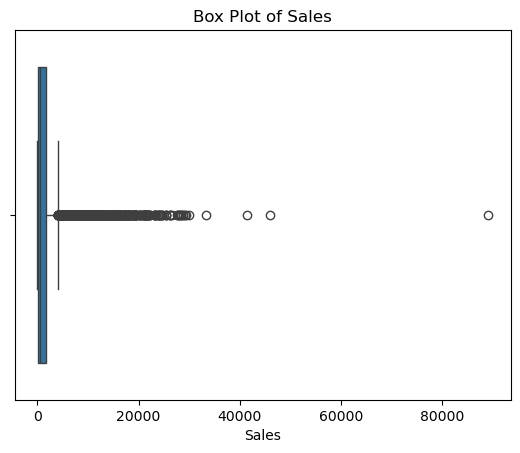

Outliers based on Isolation Forest:
      Unnamed: 0  Row ID  Order ID Order Date Order Priority  Order Quantity  \
216          216     217      1444 2017-12-05         Medium              32   
296          296     297      2053 2019-02-06       Critical              39   
314          314     315      2208 2019-04-30  Not Specified              41   
327          327     328      2247 2020-08-01  Not Specified               6   
348          348     349      2433 2017-08-21  Not Specified              14   
...          ...     ...       ...        ...            ...             ...   
7300        7300    7301     52068 2020-01-13  Not Specified              47   
7791        7791    7792     55747 2020-12-02           High              42   
7941        7941    7942     56740 2020-10-16            Low              29   
8296        8296    8297     59270 2018-01-11           High              48   
8367        8367    8368     59781 2020-12-12  Not Specified              28   

   

In [128]:
import seaborn as sns

sns.boxplot(x=df['Sales'])
plt.title("Box Plot of Sales")
plt.show()

from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)  # Assuming 1% outliers
model.fit(df[['Sales']])
predictions = model.predict(df[['Sales']])
outliers_isolation_forest = df[predictions == -1]
print("Outliers based on Isolation Forest:")
print(outliers_isolation_forest)

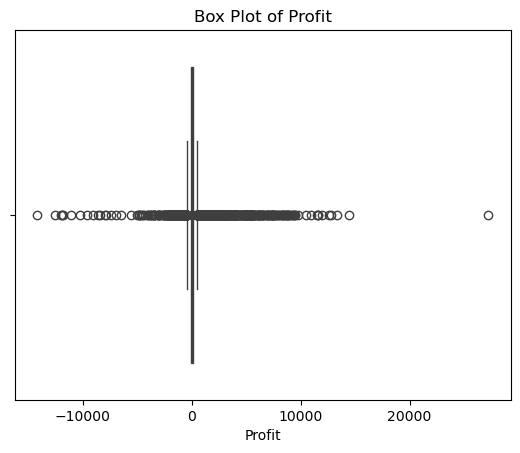

Outliers based on Isolation Forest:
      Unnamed: 0  Row ID  Order ID Order Date Order Priority  Order Quantity  \
69            69      70       417 2017-02-05         Medium              39   
216          216     217      1444 2017-12-05         Medium              32   
314          314     315      2208 2019-04-30  Not Specified              41   
327          327     328      2247 2020-08-01  Not Specified               6   
566          566     567      3841 2017-10-04  Not Specified              20   
...          ...     ...       ...        ...            ...             ...   
7777        7777    7778     55653 2018-11-26         Medium              34   
7893        7893    7894     56453 2020-04-11       Critical               1   
8296        8296    8297     59270 2018-01-11           High              48   
8358        8358    8359     59745 2017-04-19  Not Specified              36   
8367        8367    8368     59781 2020-12-12  Not Specified              28   

   

In [129]:
import seaborn as sns

sns.boxplot(x=df['Profit'])
plt.title("Box Plot of Profit")
plt.show()

from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)  # Assuming 1% outliers
model.fit(df[['Profit']])
predictions = model.predict(df[['Profit']])
outliers_isolation_forest = df[predictions == -1]
print("Outliers based on Isolation Forest:")
print(outliers_isolation_forest)

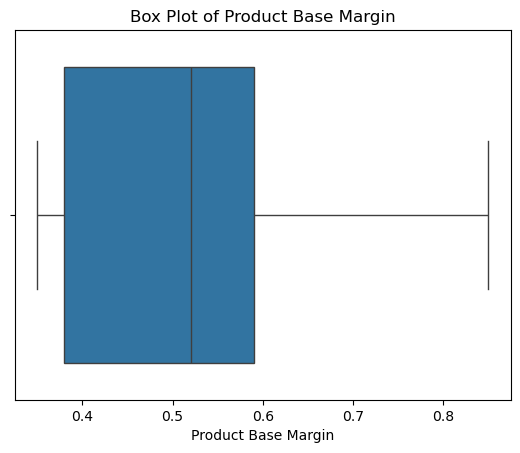

Outliers based on Isolation Forest:
      Unnamed: 0  Row ID  Order ID Order Date Order Priority  Order Quantity  \
28            28      29       194 2020-04-04         Medium               6   
60            60      61       355 2017-06-13            Low              16   
239          239     240      1637 2019-02-07  Not Specified              36   
471          471     472      3235 2019-11-14            Low              31   
579          579     580      3942 2018-06-27  Not Specified              22   
...          ...     ...       ...        ...            ...             ...   
7512        7512    7513     53635 2020-07-18  Not Specified              33   
7617        7617    7618     54501 2020-11-29       Critical              38   
8131        8131    8132     58117 2019-02-20       Critical              42   
8149        8149    8150     58278 2020-09-10           High               4   
8389        8389    8390     59939 2018-09-01         Medium              42   

   

In [130]:
import seaborn as sns

sns.boxplot(x=df['Product Base Margin'])
plt.title("Box Plot of Product Base Margin")
plt.show()

from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)  # Assuming 1% outliers
model.fit(df[['Product Base Margin']])
predictions = model.predict(df[['Product Base Margin']])
outliers_isolation_forest = df[predictions == -1]
print("Outliers based on Isolation Forest:")
print(outliers_isolation_forest)

In [131]:
# دمج جدول الطلبات والإرجاعات
merged_df = pd.merge(orders_df, returns_df, on='Order ID', how='left')

# دمج الجدول الناتج مع جدول المستخدمين
df = pd.merge(merged_df, users_df, on='Region', how='left')
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Status,Manager
0,1,3,10/13/2018,Low,6,261.540,0.04,Regular Air,-213.25,38.94,...,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,NaN,Chris
1,1,3,10/13/2018,Low,6,261.540,0.04,Regular Air,-213.25,38.94,...,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,NaN,Pat
2,2,6,2/20/2020,Not Specified,2,6.930,0.01,Regular Air,-4.64,2.08,...,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,NaN,William
3,2,6,2/20/2020,Not Specified,2,6.930,0.01,Regular Air,-4.64,2.08,...,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,NaN,Pat
4,3,32,7/15/2019,High,26,2808.080,0.07,Regular Air,1054.82,107.53,...,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,NaN,William
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,8397,59971,5/31/2019,Critical,12,356.270,0.10,Express Air,84.53,30.98,...,California,West,Home Office,Office Supplies,Paper,Xerox 19,Small Box,0.40,NaN,Pat
16794,8398,59973,11/15/2019,Low,29,11039.750,0.06,Delivery Truck,2148.97,400.97,...,Louisiana,South,Small Business,Technology,Office Machines,Epson FX-980 Dot Matrix Printer,Jumbo Drum,0.59,NaN,Sam
16795,8398,59973,11/15/2019,Low,29,11039.750,0.06,Delivery Truck,2148.97,400.97,...,Louisiana,South,Small Business,Technology,Office Machines,Epson FX-980 Dot Matrix Printer,Jumbo Drum,0.59,NaN,Pat
16796,8399,59973,11/15/2019,Low,30,4982.944,0.07,Delivery Truck,693.69,217.85,...,Louisiana,South,Small Business,Furniture,Tables,Chromcraft Bull-Nose Wood Round Conference Tab...,Jumbo Box,0.68,NaN,Sam


In [132]:
df.sample(20)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Status,Manager
13907,6954,49735,9/23/2017,Not Specified,32,1929.190,0.04,Regular Air,570.67,60.97,...,Georgia,South,Corporate,Office Supplies,Appliances,Tripp Lite Isotel 6 Outlet Surge Protector wit...,Small Box,0.56,NaN,Pat
8937,4469,31846,8/13/2019,Critical,7,261.170,0.03,Delivery Truck,-78.84,33.94,...,New York,East,Home Office,Furniture,Chairs & Chairmats,"Metal Folding Chairs, Beige, 4/Carton",Jumbo Drum,0.58,NaN,Pat
14979,7490,53476,6/11/2017,Not Specified,24,93.850,0.08,Regular Air,19.42,3.98,...,Ohio,East,Small Business,Office Supplies,Pens & Art Supplies,4009® Highlighters by Sanford,Wrap Bag,0.52,NaN,Pat
5153,2577,18595,1/31/2017,Critical,16,138.550,0.03,Regular Air,0.90,8.34,...,Pennsylvania,East,Home Office,Office Supplies,"Scissors, Rulers and Trimmers",Acme® Elite Stainless Steel Scissors,Small Pack,0.59,NaN,Pat
6811,3406,24294,8/2/2017,Not Specified,24,4865.720,0.03,Delivery Truck,1951.30,200.97,...,Illinois,Central,Home Office,Technology,Office Machines,Hewlett-Packard Deskjet 6122 Color Inkjet Printer,Jumbo Drum,0.36,NaN,Pat
13765,6883,49059,9/20/2017,Medium,5,252.660,0.02,Regular Air,32.86,48.91,...,Iowa,Central,Home Office,Office Supplies,Paper,Xerox 1891,Small Box,0.38,NaN,Pat
16698,8350,59684,12/29/2018,Medium,50,9059.900,0.07,Delivery Truck,778.01,180.98,...,Florida,South,Corporate,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,Jumbo Drum,0.57,NaN,Sam
14811,7406,52837,1/18/2020,Critical,32,5934.390,0.08,Regular Air,519.55,193.17,...,New Hampshire,East,Corporate,Office Supplies,Storage & Organization,Fellowes Staxonsteel® Drawer Files,Small Box,0.71,NaN,Pat
11054,5528,39168,5/17/2020,High,50,1027.660,0.00,Regular Air,184.07,19.98,...,Wisconsin,Central,Home Office,Office Supplies,Paper,Southworth 25% Cotton Premium Laser Paper and ...,Small Box,0.37,NaN,Chris
3089,1545,11168,10/21/2020,Critical,35,182.860,0.00,Regular Air,-106.27,4.82,...,New Mexico,West,Home Office,Furniture,Office Furnishings,Magna Visual Magnetic Picture Hangers,Small Pack,0.47,NaN,Pat


Sales analsis:

In [135]:
def calculate_after_returns(row, column_name):
  if row['Status'] == 'Returned':
    return 0
  else:
    return row[column_name]

df['Sales after returns'] = df.apply(lambda row: calculate_after_returns(row, 'Sales'), axis=1)
df['Profit after returns'] = df.apply(lambda row: calculate_after_returns(row, 'Profit'), axis=1)
df['Quantity after returns'] = df.apply(lambda row: calculate_after_returns(row, 'Order Quantity'), axis=1)
df.dtypes

Row ID                      int64
Order ID                    int64
Order Date                 object
Order Priority             object
Order Quantity              int64
Sales                     float64
Discount                  float64
Ship Mode                  object
Profit                    float64
Unit Price                float64
Shipping Cost             float64
Customer Name              object
City                       object
Zip Code                    int64
State                      object
Region                     object
Customer Segment           object
Product Category           object
Product Sub-Category       object
Product Name               object
Product Container          object
Product Base Margin       float64
Status                     object
Manager                    object
Sales after returns       float64
Profit after returns      float64
Quantity after returns      int64
dtype: object

In [136]:
df.sample(20)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Status,Manager,Sales after returns,Profit after returns,Quantity after returns
15596,7799,55808,2/14/2019,Not Specified,6,830.280,0.00,Delivery Truck,-382.98,122.99,...,Furniture,Chairs & Chairmats,"Global High-Back Leather Tilter, Burgundy",Jumbo Drum,0.74,Returned,Sam,0.000,0.00,0
2265,1133,8289,10/28/2020,Low,38,572.740,0.00,Regular Air,53.31,14.45,...,Office Supplies,Binders and Binder Accessories,"Acco Recycled 2"" Capacity Laser Printer Hangin...",Small Box,0.38,NaN,Pat,572.740,53.31,38
5536,2769,20032,11/5/2020,Medium,8,137.380,0.06,Regular Air,-11.39,17.48,...,Technology,Computer Peripherals,"Maxell Pro 80 Minute CD-R, 10/Pack",Small Pack,0.45,NaN,Sam,137.380,-11.39,8
4189,2095,14981,10/26/2018,Medium,8,279.770,0.07,Regular Air,-14.02,34.76,...,Office Supplies,Storage & Organization,"Multi-Use Personal File Cart and Caster Set, T...",Small Box,0.57,NaN,Pat,279.770,-14.02,8
12816,6409,45542,2/7/2018,High,40,4064.272,0.01,Delivery Truck,-300.85,124.49,...,Furniture,Tables,Bevis 36 x 72 Conference Tables,Jumbo Box,0.63,NaN,Erin,4064.272,-300.85,40
10338,5170,36800,9/10/2018,High,4,58.440,0.05,Express Air,-7.04,10.89,...,Office Supplies,Appliances,Belkin 6 Outlet Metallic Surge Strip,Small Box,0.59,NaN,Erin,58.440,-7.04,4
7860,3931,28007,4/8/2018,Not Specified,20,238.770,0.02,Regular Air,-78.81,11.66,...,Office Supplies,Pens & Art Supplies,Hunt BOSTON® Vista® Battery-Operated Pencil Sh...,Small Pack,0.58,NaN,William,238.770,-78.81,20
6335,3168,22755,3/30/2017,Medium,5,236.878,0.06,Regular Air,-275.25,55.99,...,Technology,Telephones and Communication,Accessory6,Small Pack,0.80,NaN,Pat,236.878,-275.25,5
5978,2990,21574,1/15/2018,Critical,33,77.550,0.00,Regular Air,-37.20,2.12,...,Technology,Computer Peripherals,Fuji Slim Jewel Case CD-R,Small Pack,0.55,NaN,Erin,77.550,-37.20,33
11981,5991,42467,10/14/2018,High,10,238.880,0.01,Regular Air,-48.21,22.38,...,Office Supplies,Binders and Binder Accessories,"Avery Flip-Chart Easel Binder, Black",Small Box,0.38,NaN,Pat,238.880,-48.21,10


What are the top-selling products and product categories?

In [137]:
# Assuming you have a 'Sales' column and a 'Status' column indicating returns
merged_df['Sales after returns'] = merged_df.apply(lambda row: row['Sales'] if row['Status'] == 'Returned' else 0, axis=1)

# Now you can use the 'Sales after returns' column for calculations
top_products = merged_df.groupby('Product Name')['Sales after returns'].sum().sort_values(ascending=False)
top_categories = merged_df.groupby('Product Category')['Sales after returns'].sum().sort_values(ascending=False)

print("Top-selling products:")
print(top_products.head(5))

print("\nTop-selling product categories:")
print(top_categories.head(5))

Top-selling products:
Product Name
Sharp AL-1530CS Digital Copier                                       45456.280
Chromcraft Bull-Nose Wood 48" x 96" Rectangular Conference Tables    40442.276
Canon PC1060 Personal Laser Copier                                   37615.920
Hewlett-Packard Deskjet 1220Cse Color Inkjet Printer                 36882.110
Global Troy™ Executive Leather Low-Back Tilter                       36122.260
Name: Sales after returns, dtype: float64

Top-selling product categories:
Product Category
Technology         605426.0155
Furniture          579818.8020
Office Supplies    469608.9100
Name: Sales after returns, dtype: float64


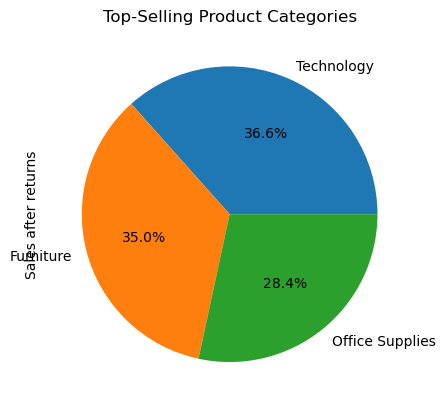

In [138]:
# Create a pie chart
top_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top-Selling Product Categories')
plt.show()


Are there any seasonal trends in sales?

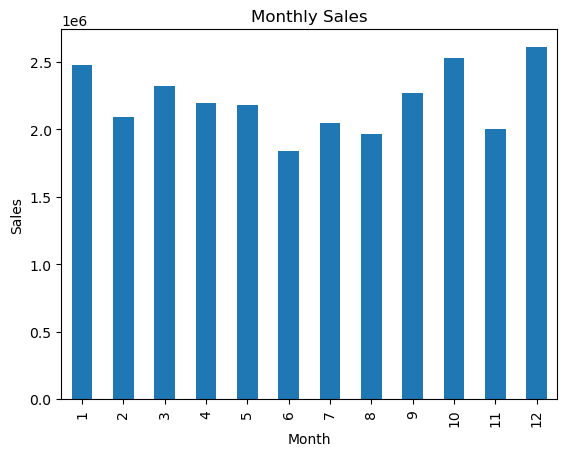

In [139]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column for the month
df['Order Month'] = df['Order Date'].dt.month

# Group by month and calculate total sales
monthly_sales = df.groupby('Order Month')['Sales after returns'].sum()

# Plot the monthly sales data
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [140]:
top_states=df.groupby(['State']).sum('Profit after return').sort_values('Profit after returns',ascending=False).head(15)
top_states=top_states[['Profit after returns']].round(2)
top_states.reset_index(inplace=True)
top_states

,State,Profit after returns
0,New York,178320.52
1,California,176018.06
2,Illinois,167589.00
3,Florida,151664.34
4,Texas,141263.96
5,Ohio,121647.76
6,Virginia,102097.34
7,Oregon,89622.12
8,Alabama,86877.04
9,Michigan,79264.02


In [141]:
top_states=df.groupby(['State']).sum('Sales').sort_values('Sales after returns',ascending=False).head(15)
top_states=top_states[['Sales after returns']].round(2)
top_states.reset_index(inplace=True)
top_states

,State,Sales after returns
0,California,2499268.18
1,Illinois,1598655.30
2,Florida,1418152.66
3,Texas,1410099.06
4,New York,1332605.79
5,Ohio,1181087.28
6,Washington,1000706.23
7,Minnesota,914755.18
8,Indiana,912784.41
9,Michigan,884042.56


How does customer segmentation affect sales performance?

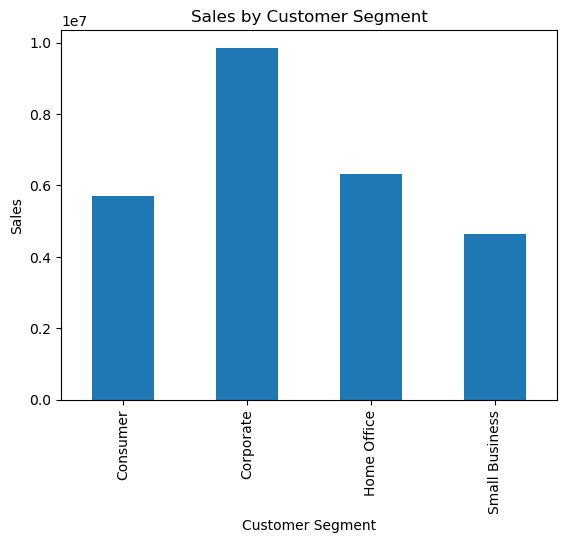

In [142]:
# Group by customer segment and calculate total sales
sales_by_segment = df.groupby('Customer Segment')['Sales after returns'].sum()

# Plot the sales by segment
sales_by_segment.plot(kind='bar')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.show()

What is the impact of discounts and promotions on sales?

Average sales before discount: 1975.857431216931
Average sales after discount: 1756.0974232631165


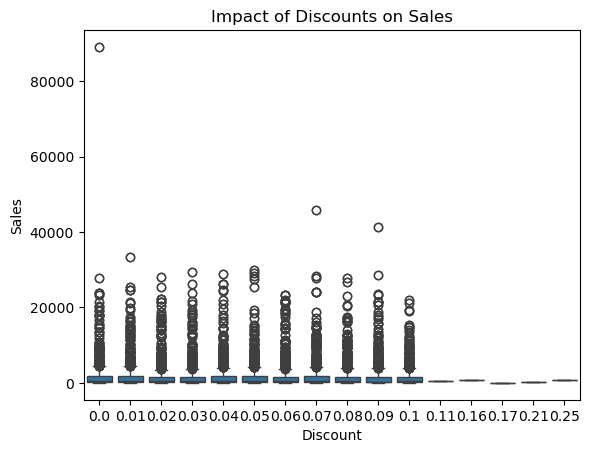

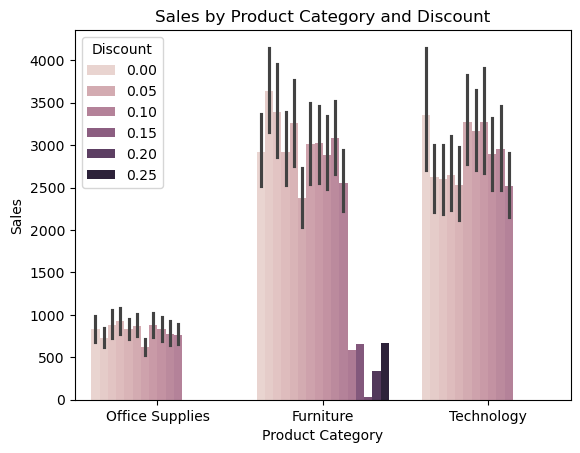

In [143]:
# Calculate average sales before and after discounts
avg_sales_before_discount = df[df['Discount'] == 0]['Sales'].mean()
avg_sales_after_discount = df[df['Discount'] > 0]['Sales'].mean()
print("Average sales before discount:", avg_sales_before_discount)
print("Average sales after discount:", avg_sales_after_discount)

# Visualize the impact of discounts
sns.boxplot(x='Discount', y='Sales', data=df)
plt.title('Impact of Discounts on Sales')
plt.show()

# Analyze by product category
sns.barplot(x='Product Category', y='Sales', hue='Discount', data=df)
plt.title('Sales by Product Category and Discount')
plt.show()

What are the most profitable products and regions?

In [148]:
# Group by product and calculate total profit
profitable_products = df.groupby('Product Name')['Profit after returns'].sum().sort_values(ascending=False)

# Group by region and calculate total profit
profitable_regions = df.groupby('Region')['Profit after returns'].sum().sort_values(ascending=False)

print("Most profitable products:")
print(profitable_products.head(5))

print("\nMost profitable regions:")
print(profitable_regions.head(5))

Most profitable products:
Product Name
Hewlett Packard LaserJet 3310 Copier                           146599.22
Global Troy™ Executive Leather Low-Back Tilter                 139321.08
Hewlett-Packard cp1700 [D, PS] Series Color Inkjet Printers     89520.12
Canon PC940 Copier                                              80141.66
GBC DocuBind 200 Manual Binding Machine                         77998.60
Name: Profit after returns, dtype: float64

Most profitable regions:
Region
Central    796551.70
South      725960.64
East       562227.80
West       561930.02
Name: Profit after returns, dtype: float64


Customer Analysis:

What is the customer purchase behavior (frequency, recency, monetary value)?

In [149]:
# Calculate recency (days since last purchase)
df['Recency'] = (df['Order Date'].max() - df['Order Date']).dt.days

# Calculate frequency (number of orders)
df['Frequency'] = df.groupby('Customer Name')['Order ID'].transform('count')

# Calculate monetary value (total amount spent)
df['Monetary Value'] = df.groupby('Customer Name')['Sales after returns'].transform('sum')

# Create RFM segments based on quartiles
rfm_quantiles = df[['Recency', 'Frequency', 'Monetary Value']].quantile([0.25, 0.5, 0.75])

# Assign RFM scores to each customer
def assign_rfm_score(row):
    rfm_scores = []
    for col in ['Recency', 'Frequency', 'Monetary Value']:
        if row[col] <= rfm_quantiles[col][0.25]:
            rfm_scores.append(4)
        elif row[col] <= rfm_quantiles[col][0.5]:
            rfm_scores.append(3)
        elif row[col] <= rfm_quantiles[col][0.75]:
            rfm_scores.append(2)
        else:
            rfm_scores.append(1)
    return ''.join(map(str, rfm_scores))

df['RFM_Segment'] = df.apply(assign_rfm_score, axis=1)
df['RFM_Segment']

0        224
1        224
2        432
3        432
4        323
        ... 
16793    311
16794    332
16795    332
16796    332
16797    332
Name: RFM_Segment, Length: 16798, dtype: object

In [150]:
# Assuming you have a DataFrame named 'df' with the calculated RFM_Segment column

# Create a function to categorize customers based on RFM segments
def categorize_customer(rfm_segment):
    if rfm_segment == '444':
        return 'Champion'
    elif rfm_segment in ['443', '434', '344']:
        return 'Loyal Customer'
    elif rfm_segment in ['442', '424', '343']:
        return 'Big Spender'
    elif rfm_segment in ['441', '414', '341']:
        return 'Recent Customer'
    elif rfm_segment in ['111', '121', '211']:
        return 'Lost Customer'
    else:
        return 'At Risk'

# Apply the categorization function to each customer
df['Customer_Category'] = df['RFM_Segment'].apply(categorize_customer)
df

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Manager,Sales after returns,Profit after returns,Quantity after returns,Order Month,Recency,Frequency,Monetary Value,RFM_Segment,Customer_Category
0,1,3,2018-10-13,Low,6,261.540,0.04,Regular Air,-213.25,38.94,...,Chris,261.540,-213.25,6,10,809,26,17592.840,224,At Risk
1,1,3,2018-10-13,Low,6,261.540,0.04,Regular Air,-213.25,38.94,...,Pat,261.540,-213.25,6,10,809,26,17592.840,224,At Risk
2,2,6,2020-02-20,Not Specified,2,6.930,0.01,Regular Air,-4.64,2.08,...,William,6.930,-4.64,2,2,314,20,49294.856,432,At Risk
3,2,6,2020-02-20,Not Specified,2,6.930,0.01,Regular Air,-4.64,2.08,...,Pat,6.930,-4.64,2,2,314,20,49294.856,432,At Risk
4,3,32,2019-07-15,High,26,2808.080,0.07,Regular Air,1054.82,107.53,...,William,2808.080,1054.82,26,7,534,30,31630.930,323,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16793,8397,59971,2019-05-31,Critical,12,356.270,0.10,Express Air,84.53,30.98,...,Pat,356.270,84.53,12,5,579,70,57946.682,311,At Risk
16794,8398,59973,2019-11-15,Low,29,11039.750,0.06,Delivery Truck,2148.97,400.97,...,Sam,11039.750,2148.97,29,11,411,22,42654.356,332,At Risk
16795,8398,59973,2019-11-15,Low,29,11039.750,0.06,Delivery Truck,2148.97,400.97,...,Pat,11039.750,2148.97,29,11,411,22,42654.356,332,At Risk
16796,8399,59973,2019-11-15,Low,30,4982.944,0.07,Delivery Truck,693.69,217.85,...,Sam,4982.944,693.69,30,11,411,22,42654.356,332,At Risk


How many numbers of customers in each segment

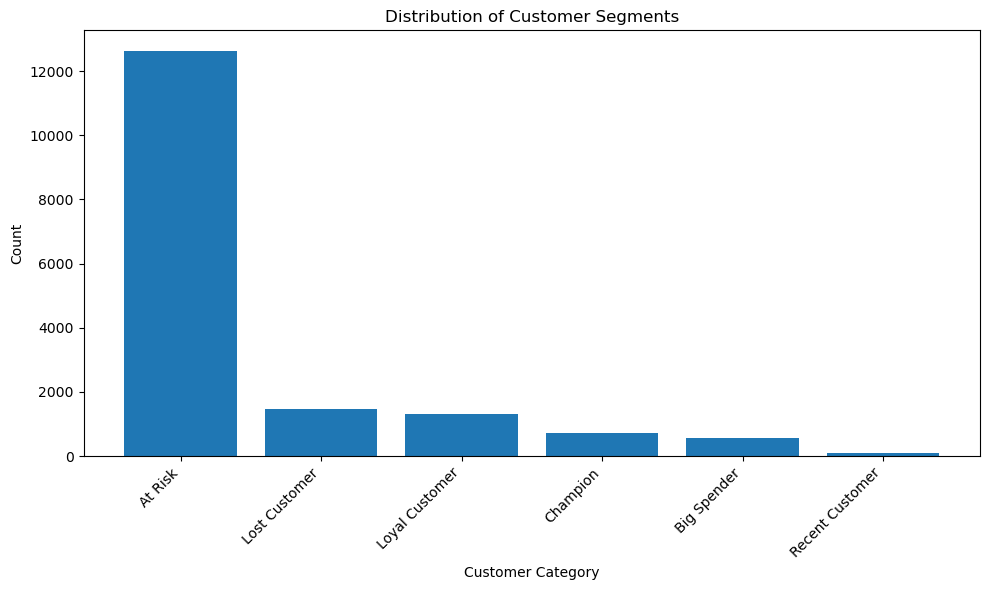

In [151]:
# Count the number of customers in each segment
segment_counts = df['Customer_Category'].value_counts()

# Increase figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as desired

# Create a bar chart
plt.bar(segment_counts.index, segment_counts)
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing between elements for better visualization
plt.show()

Product Analysis:

Getting the sales towards each sub category which belongs to a specific category

In [152]:
df.groupby(['Product Category','Product Sub-Category', 'Product Name'])['Sales after returns'].sum().reset_index()

,Product Category,Product Sub-Category,Product Name,Sales after returns
0,Furniture,Bookcases,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",67376.840
1,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",33288.480
2,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",59696.020
3,Furniture,Bookcases,"Bush Cubix Collection Bookcases, Fully Assembled",27113.860
4,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,15243.600
...,...,...,...,...
1258,Technology,Telephones and Communication,i500plus,7410.827
1259,Technology,Telephones and Communication,i600,5584.738
1260,Technology,Telephones and Communication,iDEN i550,12528.371
1261,Technology,Telephones and Communication,iDEN i95,10911.382


what is the total_returns

In [153]:
total_returns = df[df['Status'] == 'Returned'].shape[0]
print("total_returns:", total_returns)

total_returns: 1744


what is the top returned product name

In [154]:
product_returns = df[df['Status'] == 'Returned'].groupby('Product Name')['Status'].count()
top_returned_products = product_returns.sort_values(ascending=False)
top_returned_products

Product Name
O'Sullivan Elevations Bookcase, Cherry Finish      10
Bush Mission Pointe Library                        10
Imation Neon Mac Format Diskettes, 10/Pack         10
Coloredge Poster Frame                             10
Riverside Furniture Stanwyck Manor Table Series    10
                                                   ..
Fellowes Neat Ideas® Storage Cubes                  2
Fellowes Internet Keyboard, Platinum                2
Fellowes EZ Multi-Media Keyboard                    2
Fellowes Black Plastic Comb Bindings                2
iDEN i95                                            2
Name: Status, Length: 596, dtype: int64

what is the top returned product sales

In [155]:
sales_returns = df[df['Status'] == 'Returned'].groupby('Product Name')['Sales'].sum()
top_returned_sales = sales_returns.sort_values(ascending=False)
top_returned_sales

Product Name
Sharp AL-1530CS Digital Copier                                                       90912.560
Chromcraft Bull-Nose Wood 48" x 96" Rectangular Conference Tables                    80884.552
Canon PC1060 Personal Laser Copier                                                   75231.840
Hewlett-Packard Deskjet 1220Cse Color Inkjet Printer                                 73764.220
Global Troy™ Executive Leather Low-Back Tilter                                       72244.520
                                                                                       ...    
Acme Design Line 8" Stainless Steel Bent Scissors w/Champagne Handles, 3-1/8" Cut       30.000
Newell 346                                                                              25.600
Wirebound Message Book, 4 per Page                                                      23.020
Xerox 1949                                                                              19.500
Avery 491                            

#check

In [156]:
#check
product_to_find = "Sharp AL-1530CS Digital Copier"
count_of_returns = product_returns.loc[product_to_find]
print(count_of_returns)

4


In [157]:
df[(df['Product Name'] == 'Sharp AL-1530CS Digital Copier')]

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Manager,Sales after returns,Profit after returns,Quantity after returns,Order Month,Recency,Frequency,Monetary Value,RFM_Segment,Customer_Category
1668,835,5988,2018-11-21,Not Specified,40,19109.61,0.10,Express Air,-379.29,499.99,...,Chris,19109.61,-379.29,40,11,770,24,77199.808,231,At Risk
1669,835,5988,2018-11-21,Not Specified,40,19109.61,0.10,Express Air,-379.29,499.99,...,Pat,19109.61,-379.29,40,11,770,24,77199.808,231,At Risk
3538,1770,12704,2018-02-09,Low,44,21506.77,0.06,Regular Air,1260.51,499.99,...,Chris,0.00,0.00,0,2,1055,66,60959.943,211,Lost Customer
3539,1770,12704,2018-02-09,Low,44,21506.77,0.06,Regular Air,1260.51,499.99,...,Pat,0.00,0.00,0,2,1055,66,60959.943,211,Lost Customer
5032,2517,18279,2017-02-26,Medium,20,10281.79,0.03,Regular Air,3272.90,499.99,...,William,10281.79,3272.90,20,2,1403,24,49754.740,132,At Risk
5033,2517,18279,2017-02-26,Medium,20,10281.79,0.03,Regular Air,3272.90,499.99,...,Pat,10281.79,3272.90,20,2,1403,24,49754.740,132,At Risk
5538,2770,20033,2018-05-21,Critical,5,2543.95,0.04,Regular Air,-1011.32,499.99,...,Chris,2543.95,-1011.32,5,5,954,44,102311.598,211,Lost Customer
5539,2770,20033,2018-05-21,Critical,5,2543.95,0.04,Regular Air,-1011.32,499.99,...,Pat,2543.95,-1011.32,5,5,954,44,102311.598,211,Lost Customer
6450,3226,23168,2018-09-15,Low,46,23949.51,0.00,Express Air,-1312.84,499.99,...,William,0.00,0.00,0,9,837,82,66766.933,211,Lost Customer
6451,3226,23168,2018-09-15,Low,46,23949.51,0.00,Express Air,-1312.84,499.99,...,Pat,0.00,0.00,0,9,837,82,66766.933,211,Lost Customer


what is the top returned product category

In [158]:
product_category_returns = df[df['Status'] == 'Returned'].groupby('Product Name')['Sales'].count()
top_returned_product_category = product_returns.sort_values(ascending=False)
top_returned_product_category

Product Name
O'Sullivan Elevations Bookcase, Cherry Finish      10
Bush Mission Pointe Library                        10
Imation Neon Mac Format Diskettes, 10/Pack         10
Coloredge Poster Frame                             10
Riverside Furniture Stanwyck Manor Table Series    10
                                                   ..
Fellowes Neat Ideas® Storage Cubes                  2
Fellowes Internet Keyboard, Platinum                2
Fellowes EZ Multi-Media Keyboard                    2
Fellowes Black Plastic Comb Bindings                2
iDEN i95                                            2
Name: Status, Length: 596, dtype: int64

which customer segment has highest order quantity

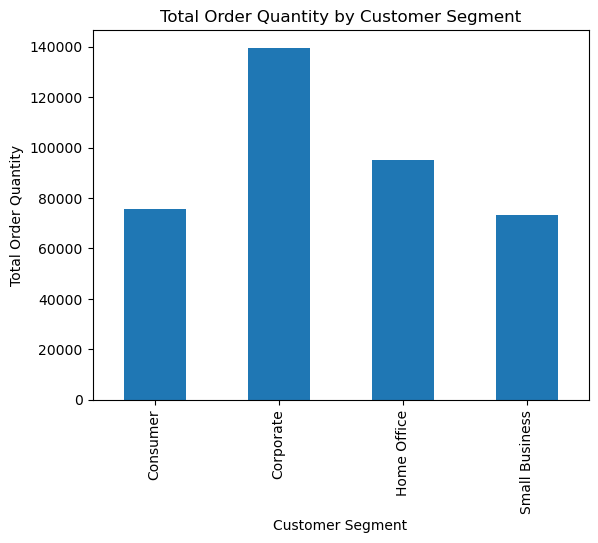

In [159]:
# Create a bar chart
segment_quantities = df.groupby('Customer Segment')['Quantity after returns'].sum()
segment_quantities.plot(kind='bar')
plt.title('Total Order Quantity by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Order Quantity')
plt.show()

In [160]:
product_counts = df.groupby(['Customer_Category', 'Product Name']).size().reset_index(name='Count')
top_products_per_segment = product_counts.groupby('Customer_Category').apply(lambda x: x.nlargest(1, 'Count'))
print(top_products_per_segment)

                       Customer_Category  \
Customer_Category                          
At Risk           287            At Risk   
Big Spender       1423       Big Spender   
Champion          1492          Champion   
Lost Customer     1892     Lost Customer   
Loyal Customer    2595    Loyal Customer   
Recent Customer   2810   Recent Customer   

                                                             Product Name  \
Customer_Category                                                           
At Risk           287   BoxOffice By Design Rectangular and Half-Moon ...   
Big Spender       1423    Riverside Furniture Stanwyck Manor Table Series   
Champion          1492            #10- 4 1/8" x 9 1/2" Recycled Envelopes   
Lost Customer     1892                    Bevis 36 x 72 Conference Tables   
Loyal Customer    2595         Master Giant Foot® Doorstop, Safety Yellow   
Recent Customer   2810         80 Minute CD-R Spindle, 100/Pack - Staples   

                        Count 

C:\Users\compu_tech\AppData\Local\Temp\ipykernel_11592\2387127342.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_segment = product_counts.groupby('Customer_Category').apply(lambda x: x.nlargest(1, 'Count'))


In [161]:
top_products_per_segment = product_counts.groupby('Customer_Category').apply(lambda x: x.nlargest(1, 'Count'))
total_sales_per_segment = df.groupby('Customer_Category')['Sales after returns'].sum()
print(total_sales_per_segment)

Customer_Category
At Risk            1.910522e+07
Big Spender        1.299737e+06
Champion           6.420797e+05
Lost Customer      3.340670e+06
Loyal Customer     1.500495e+06
Recent Customer    6.332884e+05
Name: Sales after returns, dtype: float64


C:\Users\compu_tech\AppData\Local\Temp\ipykernel_11592\2840194687.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_segment = product_counts.groupby('Customer_Category').apply(lambda x: x.nlargest(1, 'Count'))


In [162]:
container_counts = df['Product Container'].value_counts()
container_counts

Product Container
Small Box     8694
Wrap Bag      2336
Small Pack    1912
Jumbo Drum    1248
Jumbo Box     1064
Large Box      812
Medium Box     732
Name: count, dtype: int64

In [163]:
# Count occurrences of each "Product Container" type for each "Product Category"
container_counts_by_product_category = df.groupby('Product Category')['Product Container'].value_counts()
print(container_counts_by_product_category)

Product Category  Product Container
Furniture         Jumbo Box             976
                  Jumbo Drum            748
                  Small Box             498
                  Small Pack            420
                  Large Box             328
                  Wrap Bag              240
                  Medium Box            238
Office Supplies   Small Box            6118
                  Wrap Bag             1950
                  Small Pack            504
                  Large Box             320
                  Medium Box            178
                  Jumbo Drum            150
Technology        Small Box            2078
                  Small Pack            988
                  Jumbo Drum            350
                  Medium Box            316
                  Large Box             164
                  Wrap Bag              146
                  Jumbo Box              88
Name: count, dtype: int64


In [164]:
# Count occurrences of each "Product Container" type for each "Product Sub-Category"
container_counts_by_product_sub_category = df.groupby('Product Sub-Category')['Product Container'].value_counts()
print(container_counts_by_product_sub_category)

Product Sub-Category            Product Container
Appliances                      Small Box             540
                                Medium Box            128
                                Large Box             106
                                Jumbo Drum             94
Binders and Binder Accessories  Small Box            1830
Bookcases                       Jumbo Box             378
Chairs & Chairmats              Jumbo Drum            678
                                Large Box              64
                                Medium Box             30
Computer Peripherals            Small Box             768
                                Small Pack            748
Copiers and Fax                 Large Box             144
                                Jumbo Drum             30
Envelopes                       Small Box             492
Labels                          Small Box             576
Office Furnishings              Small Box             498
                      

In [165]:
# Count occurrences of each "Product Container" type for each "Customer Segment"
container_counts_by_customer_segment = df.groupby('Customer Segment')['Product Container'].value_counts()
print(container_counts_by_customer_segment)

Customer Segment  Product Container
Consumer          Small Box            1656
                  Wrap Bag              452
                  Small Pack            404
                  Jumbo Drum            244
                  Jumbo Box             224
                  Large Box             172
                  Medium Box            146
Corporate         Small Box            3222
                  Wrap Bag              842
                  Small Pack            706
                  Jumbo Drum            464
                  Jumbo Box             384
                  Large Box             272
                  Medium Box            262
Home Office       Small Box            2116
                  Wrap Bag              578
                  Small Pack            446
                  Jumbo Drum            290
                  Jumbo Box             248
                  Large Box             200
                  Medium Box            186
Small Business    Small Box            1

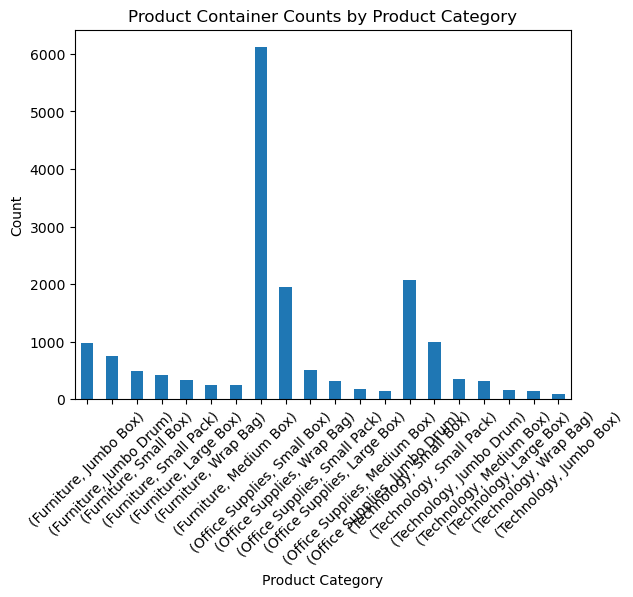

In [166]:
# Create a bar chart
container_counts_by_product_category.plot(kind='bar')

# Set chart title and labels
plt.title('Product Container Counts by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

time serious analysis

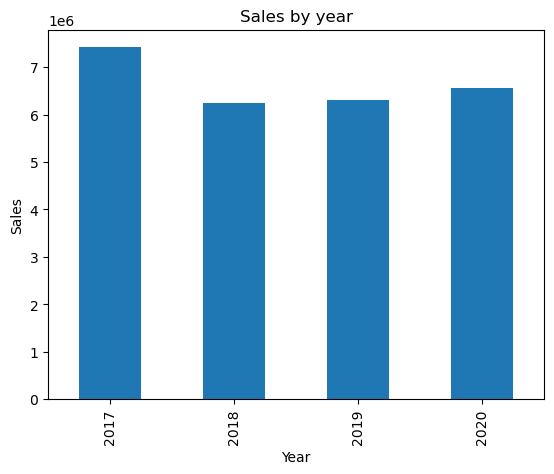

In [167]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a new column for the month
df['Order Year'] = df['Order Date'].dt.year

# Group by year and calculate total sales
Sales_by_year = df.groupby('Order Year')['Sales after returns'].sum()

# Plot the sales by year data
Sales_by_year.plot(kind='bar')
plt.title('Sales by year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

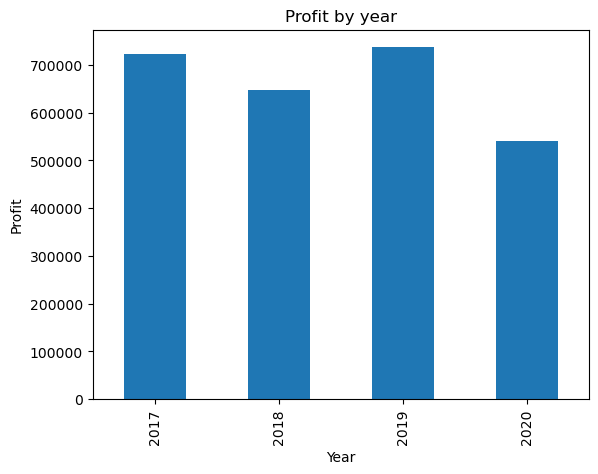

In [168]:
# Group by year and calculate total sales
Profit_by_year = df.groupby('Order Year')['Profit after returns'].sum()

# Plot the Profit_by_year data
Profit_by_year.plot(kind='bar')
plt.title('Profit by year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

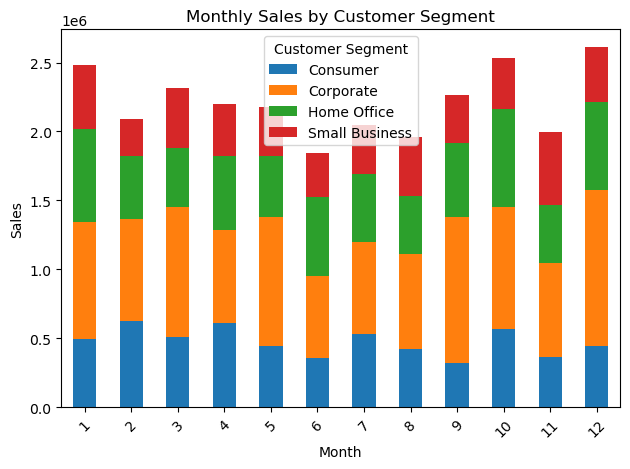

In [169]:
# Create a new column for the month
df['Order Month'] = df['Order Date'].dt.month

# Group by month and Customer Segment, calculate total sales
monthly_sales_by_segment = df.groupby(['Order Month', 'Customer Segment'])['Sales after returns'].sum()

# Unstack the DataFrame to get sales per month for each segment
monthly_sales_by_segment = monthly_sales_by_segment.unstack()

# Plot the monthly sales data (consider using a stacked bar chart)
monthly_sales_by_segment.plot(kind='bar', stacked=True)
plt.title('Monthly Sales by Customer Segment')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Customer Segment')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

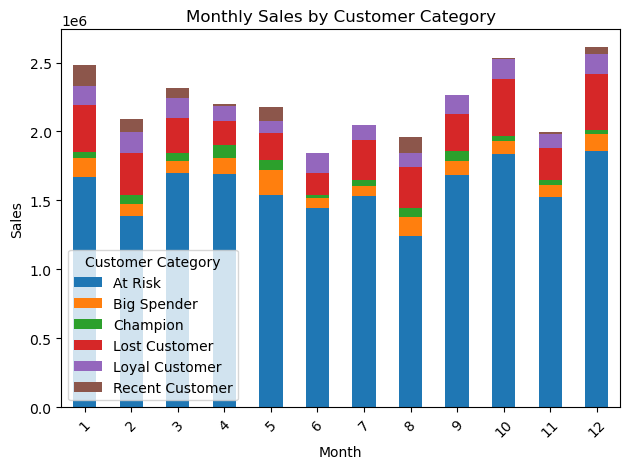

In [170]:
# Group by month and Customer_Category, calculate total sales
monthly_sales_by_category = df.groupby(['Order Month', 'Customer_Category'])['Sales after returns'].sum()

# Unstack the DataFrame to get sales per month for each category
monthly_sales_by_category = monthly_sales_by_category.unstack()

# Plot the monthly sales data (consider using a stacked bar chart)
monthly_sales_by_category.plot(kind='bar', stacked=True)
plt.title('Monthly Sales by Customer Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Customer Category')  
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

In [171]:
# Calculate correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Build a linear regression model
X = df[['column1', 'column2']] 
y = df['Sales after returns']
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: could not convert string to float: 'Low'

What are the most popular shipping methods for each customer Segment ?

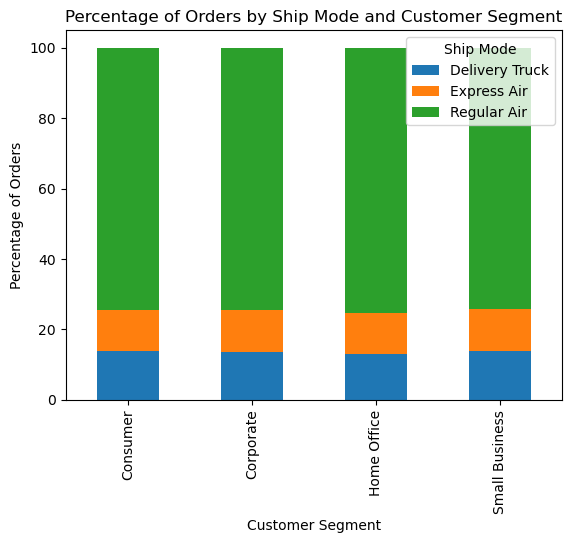

In [172]:
# Create a cross-tabulation of Ship Mode and Customer Segment
crosstab = pd.crosstab(df['Customer Segment'], df['Ship Mode'])

# Calculate percentages within each Customer Segment
crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plot the results as a stacked bar chart
crosstab_pct.plot(kind='bar', stacked=True)
plt.title('Percentage of Orders by Ship Mode and Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage of Orders')
plt.legend(title='Ship Mode')
plt.show()

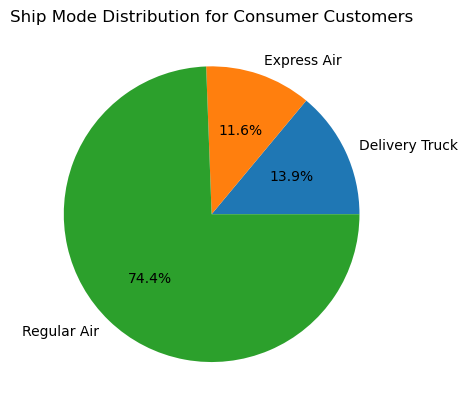

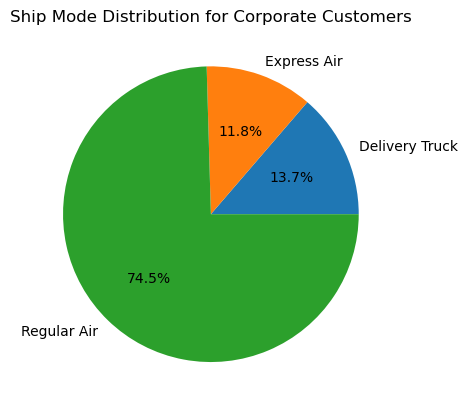

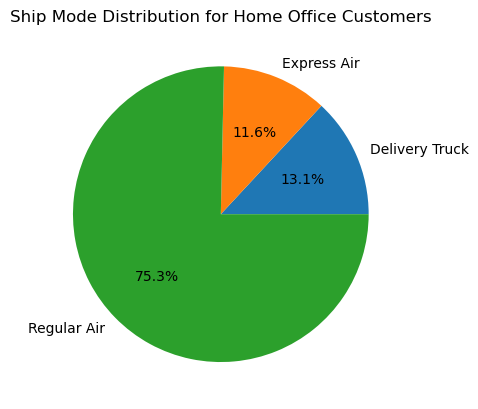

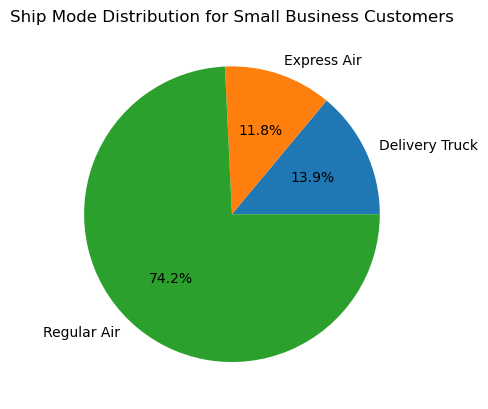

In [173]:
# Create separate pie charts for each Customer Segment
for segment in crosstab.index:
    segment_data = crosstab.loc[segment]  # Get data for each segment
    plt.figure()  # Create a new figure for each segment
    plt.pie(segment_data, labels=segment_data.index, autopct='%1.1f%%')
    plt.title(f'Ship Mode Distribution for {segment} Customers')
    plt.show()

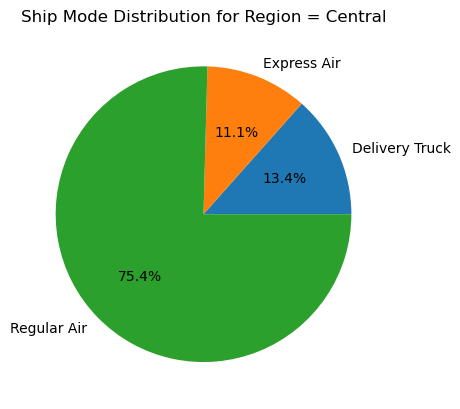

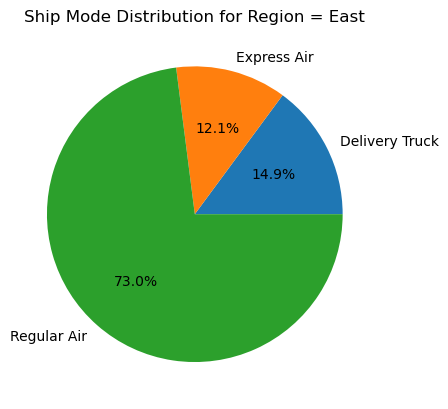

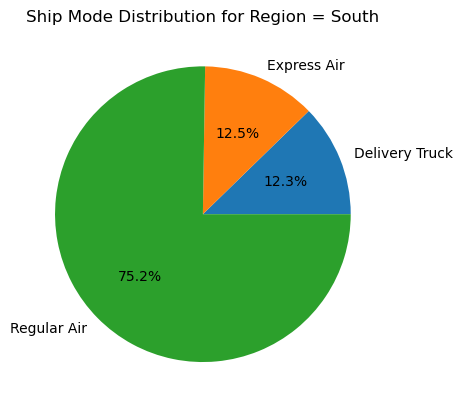

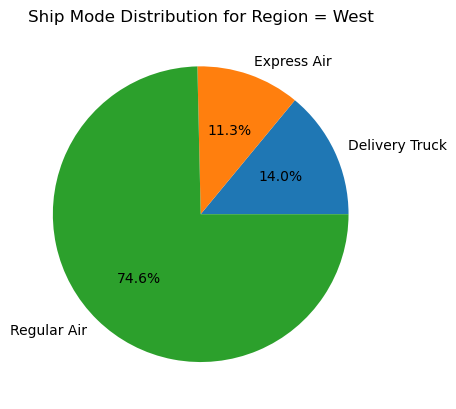

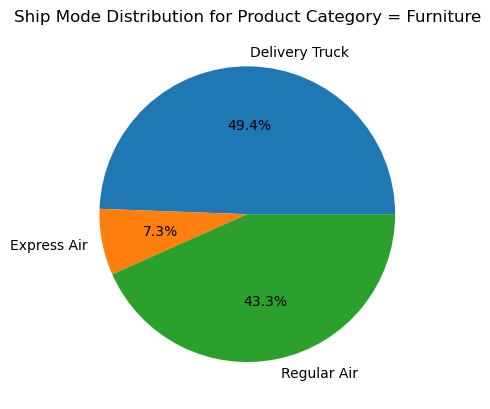

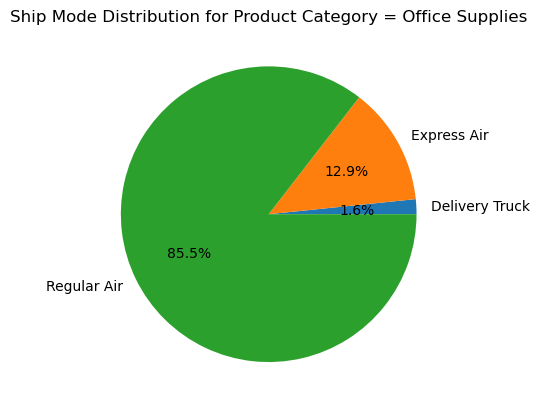

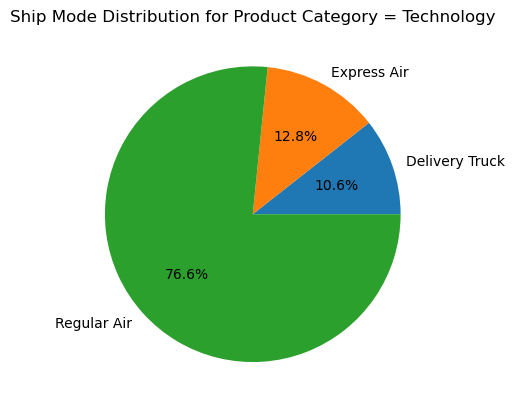

In [174]:
# قائمة الأعمدة التي تريد تحليلها
columns_to_analyze = ['Region', 'Product Category']

# تكرار العملية لكل عمود
for column in columns_to_analyze:
    # إنشاء جدول ترددات متقاطع جديد لكل عمود
    crosstab = pd.crosstab(df[column], df['Ship Mode'])

    # رسم مخططات دائرية لكل فئة في العمود الحالي
    for segment in crosstab.index:
        segment_data = crosstab.loc[segment]
        plt.figure()
        plt.pie(segment_data, labels=segment_data.index, autopct='%1.1f%%')
        plt.title(f'Ship Mode Distribution for {column} = {segment}')
        plt.show()

forcasting

In [175]:
df.sample(10)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Sales after returns,Profit after returns,Quantity after returns,Order Month,Recency,Frequency,Monetary Value,RFM_Segment,Customer_Category,Order Year
16284,8143,58241,2018-09-07,Critical,36,146.7100,0.01,Regular Air,38.63,4.00,...,146.7100,38.63,36,9,845,60,66939.800,211,Lost Customer,2018
1570,786,5607,2019-12-31,Not Specified,8,61.8715,0.00,Regular Air,-50.33,7.99,...,61.8715,-50.33,8,12,365,28,43650.000,322,At Risk,2019
3305,1653,11910,2019-06-15,High,21,49.2300,0.01,Regular Air,-77.71,1.98,...,49.2300,-77.71,21,6,564,24,18931.952,334,At Risk,2019
7764,3883,27745,2018-09-20,Low,41,6126.9300,0.01,Delivery Truck,-1704.89,146.05,...,6126.9300,-1704.89,41,9,832,70,57946.682,211,Lost Customer,2018
14648,7325,52197,2020-08-04,Critical,23,91.9400,0.01,Regular Air,-10.11,3.95,...,91.9400,-10.11,23,8,148,32,36449.733,423,At Risk,2020
14602,7302,52068,2020-01-13,Not Specified,21,1217.5000,0.07,Delivery Truck,-412.36,58.14,...,0.0000,0.00,0,1,352,40,51611.448,412,At Risk,2020
4728,2365,17093,2020-02-11,Not Specified,50,4550.0600,0.10,Delivery Truck,-1335.32,95.98,...,4550.0600,-1335.32,50,2,323,22,67855.820,431,At Risk,2020
15193,7597,54368,2019-11-01,Not Specified,16,79.5300,0.08,Regular Air,-48.55,4.98,...,0.0000,0.00,0,11,425,24,21385.940,333,At Risk,2019
15100,7551,54020,2020-01-31,Low,43,270.5600,0.09,Regular Air,-140.48,6.48,...,270.5600,-140.48,43,1,334,22,41997.335,432,At Risk,2020
4235,2118,15109,2018-12-14,Not Specified,11,230.7200,0.08,Regular Air,-68.76,20.95,...,230.7200,-68.76,11,12,747,50,57927.813,211,Lost Customer,2018


In [176]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Rest of your code for sales decomposition and forecasting...
sales_decomposed = seasonal_decompose(df['Sales after returns'], model='multiplicative')  # Choose 'additive' or 'multiplicative' based on your data
sales_trend = sales_decomposed.trend
sales_seasonal = sales_decomposed.seasonal
sales_residual = sales_decomposed.resid

# Optional: Plot the decomposed components to visualize trends and seasonality
sales_decomposed.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

C:\Users\compu_tech\AppData\Local\Temp\ipykernel_11592\983063464.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_period, freq='M')


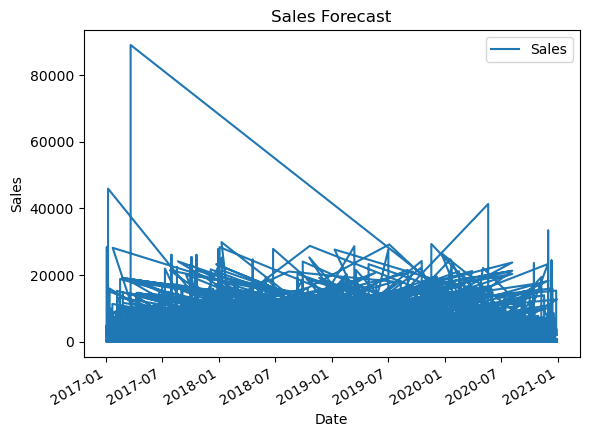

In [177]:
# Split data into training and testing sets (optional)
# Here, we use the entire dataset for simplicity
training_data = df['Sales after returns']

# Create features (if necessary) - for linear regression, time can be a feature
features = pd.DataFrame({'t': range(len(training_data))})

# Train the model
model = LinearRegression()
model.fit(features, training_data)

# Forecast future sales (adjust forecast_period based on your needs)
forecast_period = 12  # Number of months to forecast
future_dates = pd.date_range(start=df.index[-1], periods=forecast_period, freq='M')
future_features = pd.DataFrame({'t': range(len(future_dates))})
sales_forecast = model.predict(future_features)

# Combine forecast with actual data (optional)
combined_sales = pd.concat([df['Sales after returns'], pd.Series(sales_forecast, index=future_dates)])

# Plot the results
combined_sales.plot(label='Sales')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()